In [59]:
#爬取新聞並變成csv檔
#概念就是，當我們網頁往下滾到底部後，會觸發網頁的 JavaScript 程式，讓它透過 Ajax 動態載入，將新聞資料一直載入進來，所以這也是動態爬蟲的一種情況。
#這裡我們使用 requests 模組來發送請求，並使用 requests.get() 方法來發送 GET 請求，然後使用 response.json() 方法來解析返回的 JSON 資料。
import requests
import time

page_num = 23  # 此為設定要爬取的頁數，經過實測，一天新聞的量大約需請求23頁。
print("爬取之新聞網址:")
def get_news_list(page_num):
    """爬取新聞列表"""
    base_url = "https://udn.com/api/more" 
    news_list = []
    for page in range(page_num):
        channelId = 1
        cate_id = 0
        type_ = 'breaknews'
        query = f"page={page+1}&channelId={channelId}&cate_id={cate_id}&type={type_}"
        news_list_url = base_url + '?' + query
        print(news_list_url)
        
        try:
            # 使用 requests 發起請求
            response = requests.get(news_list_url)
            response.raise_for_status()  # 檢查請求是否成功
            data = response.json()  # 解析返回的 JSON 資料
            news_list.extend(data.get('lists', []))  # 假設新聞列表在 'lists' 鍵中
        except requests.RequestException as e:
            print(f"請求第 {page+1} 頁時出錯: {e}")
            print("請檢查網頁連結的合法性，並確保網路連線正常。")
            print("如果問題仍然存在，可以稍後重試。")
            break  # 如果請求失敗，退出循環

    return news_list

# 調用函數獲取新聞列表
news_list = get_news_list(page_num)

爬取之新聞網址:
https://udn.com/api/more?page=1&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=2&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=3&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=4&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=5&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=6&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=7&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=8&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=9&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=10&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=11&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=12&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=13&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/more?page=14&channelId=1&cate_id=0&type=breaknews
https://udn.com/api/

In [60]:
#生成dataframe
import pandas as pd
# 將 JSON 數據轉換為 DataFrame
df = pd.DataFrame(news_list)

# 提取所有標題，並將缺失值（NaN）排除
text = " ".join(df['title'].dropna())

In [61]:
#生成文字雲所需之套件
import jieba
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt

In [62]:
# 定義停用詞
stopwords = """的
了
在
是
我
有
和
不
人
都
一
對
說
要
來
這
他
也
為
以
上
下
為什麼
所以
那
把
它
你
她
我們的
他們
他們的
來自
可以
去
這些
會
還
的
為了
如果
但
之後
當
會
此
其
從
等
更多
因
己
後
變
與
又
"""


In [63]:
# 在此輸入中文字體路徑，記得下載字體檔案(這邊是用相對路徑)
font_path = r"font\LXGWWenKaiMono-Regular.ttf"


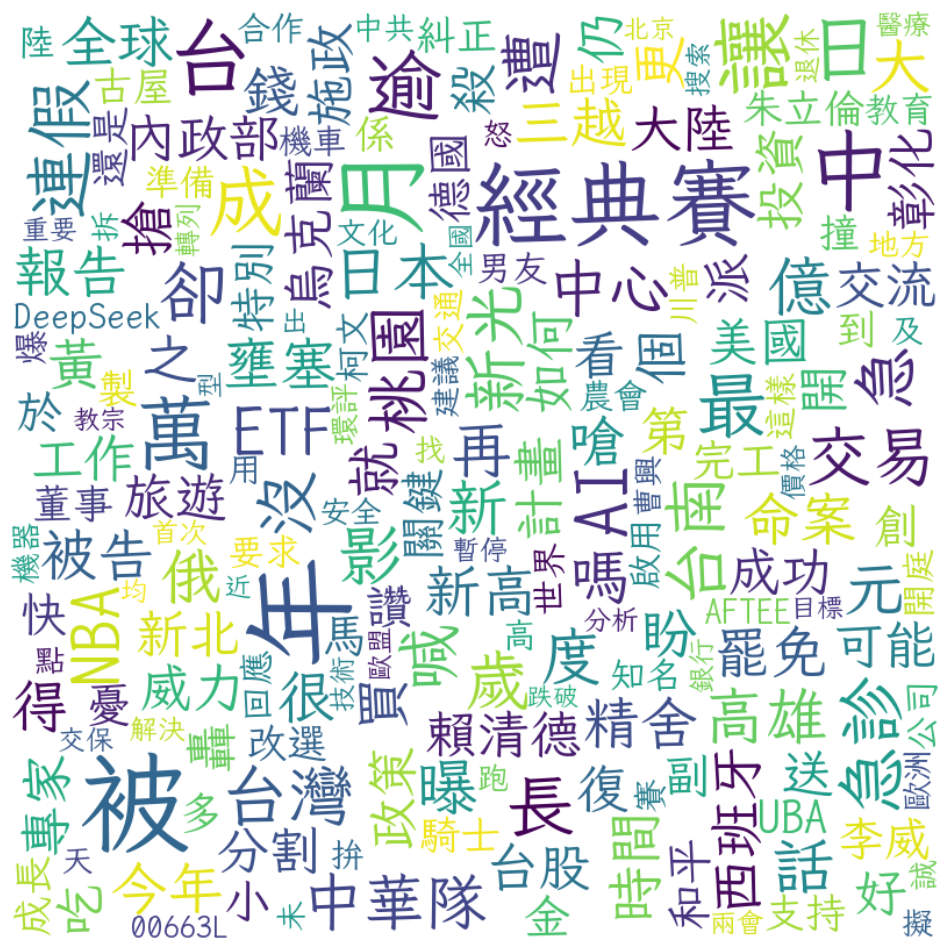

In [64]:
#生成文字雲圖片

# 將停用詞保存到文件
with open("stopwords.txt", "w", encoding="utf-8") as file:
    file.write(stopwords.strip())

# 加載停用詞
stopwords_path = "stopwords.txt"
def load_stopwords(stopwords_path):
    with open(stopwords_path, 'r', encoding='utf-8') as f:
        return set(f.read().splitlines())
stopwords = load_stopwords(stopwords_path)


# 使用 jieba 進行中文分詞並過濾停用詞
segmented_text = " ".join([word for word in jieba.cut(text) if word not in stopwords])

# 生成文字雲
wordcloud = WordCloud(
    font_path=font_path,
    width=800,  # 調整輸出圖片的寬度
    height=800, # 調整輸出圖片的高度
    background_color='white',
    mask=None,   # 使用預設的矩形
    contour_width=2, # 設置輪廓線寬度
    contour_color='gray', # 設置輪廓線顏色
    min_font_size=10, # 設置最小字體大小
    max_font_size=100, # 設置最大字體大小
    prefer_horizontal=0.7, # 設置水平顯示的詞的比例
    collocations=False # 避免重複單詞
).generate(segmented_text)

# 顯示文字雲
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 保存為圖片文件
# wordcloud.to_file("wordcloud.png")
wordcloud.to_file("img/wordcloud.png")

In [65]:
#將爬取之新聞輸出成csv檔，可指定輸出路徑
df.to_csv("csv/news.csv", index=False)
print("新聞已經成功爬取並輸出成 news.csv 檔。")

新聞已經成功爬取並輸出成 news.csv 檔。
